In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
import splitfolders

from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
base_path = 'E:\\Datasets\\ASL\\asl_dataset'

categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

filenames_list = []
categories_list = []


for category in categories:
    path = os.path.join(base_path, categories[category])
    filenames = os.listdir(path)
    for filename in filenames:
        filenames_list.append(os.path.join(categories[category],filename))
    #filenames_list = filenames_list+ filenames
    categories_list = categories_list + [category]*len(filenames)

df = pd.DataFrame({'filename': filenames_list, 'category': categories_list} )
df = df.sample(frac=1).reset_index(drop=True)

df

filename  category
0       v\hand1_v_top_seg_5_cropped.jpeg        31
1     b\hand2_b_right_seg_2_cropped.jpeg        11
2       f\hand2_f_bot_seg_5_cropped.jpeg        15
3       3\hand1_3_bot_seg_3_cropped.jpeg         3
4       i\hand5_i_dif_seg_1_cropped.jpeg        18
...                                  ...       ...
2510    8\hand5_8_bot_seg_4_cropped.jpeg         8
2511    i\hand1_i_top_seg_3_cropped.jpeg        18
2512    f\hand5_f_dif_seg_1_cropped.jpeg        15
2513    g\hand1_g_dif_seg_1_cropped.jpeg        16
2514    5\hand1_5_dif_seg_2_cropped.jpeg         5

[2515 rows x 2 columns]

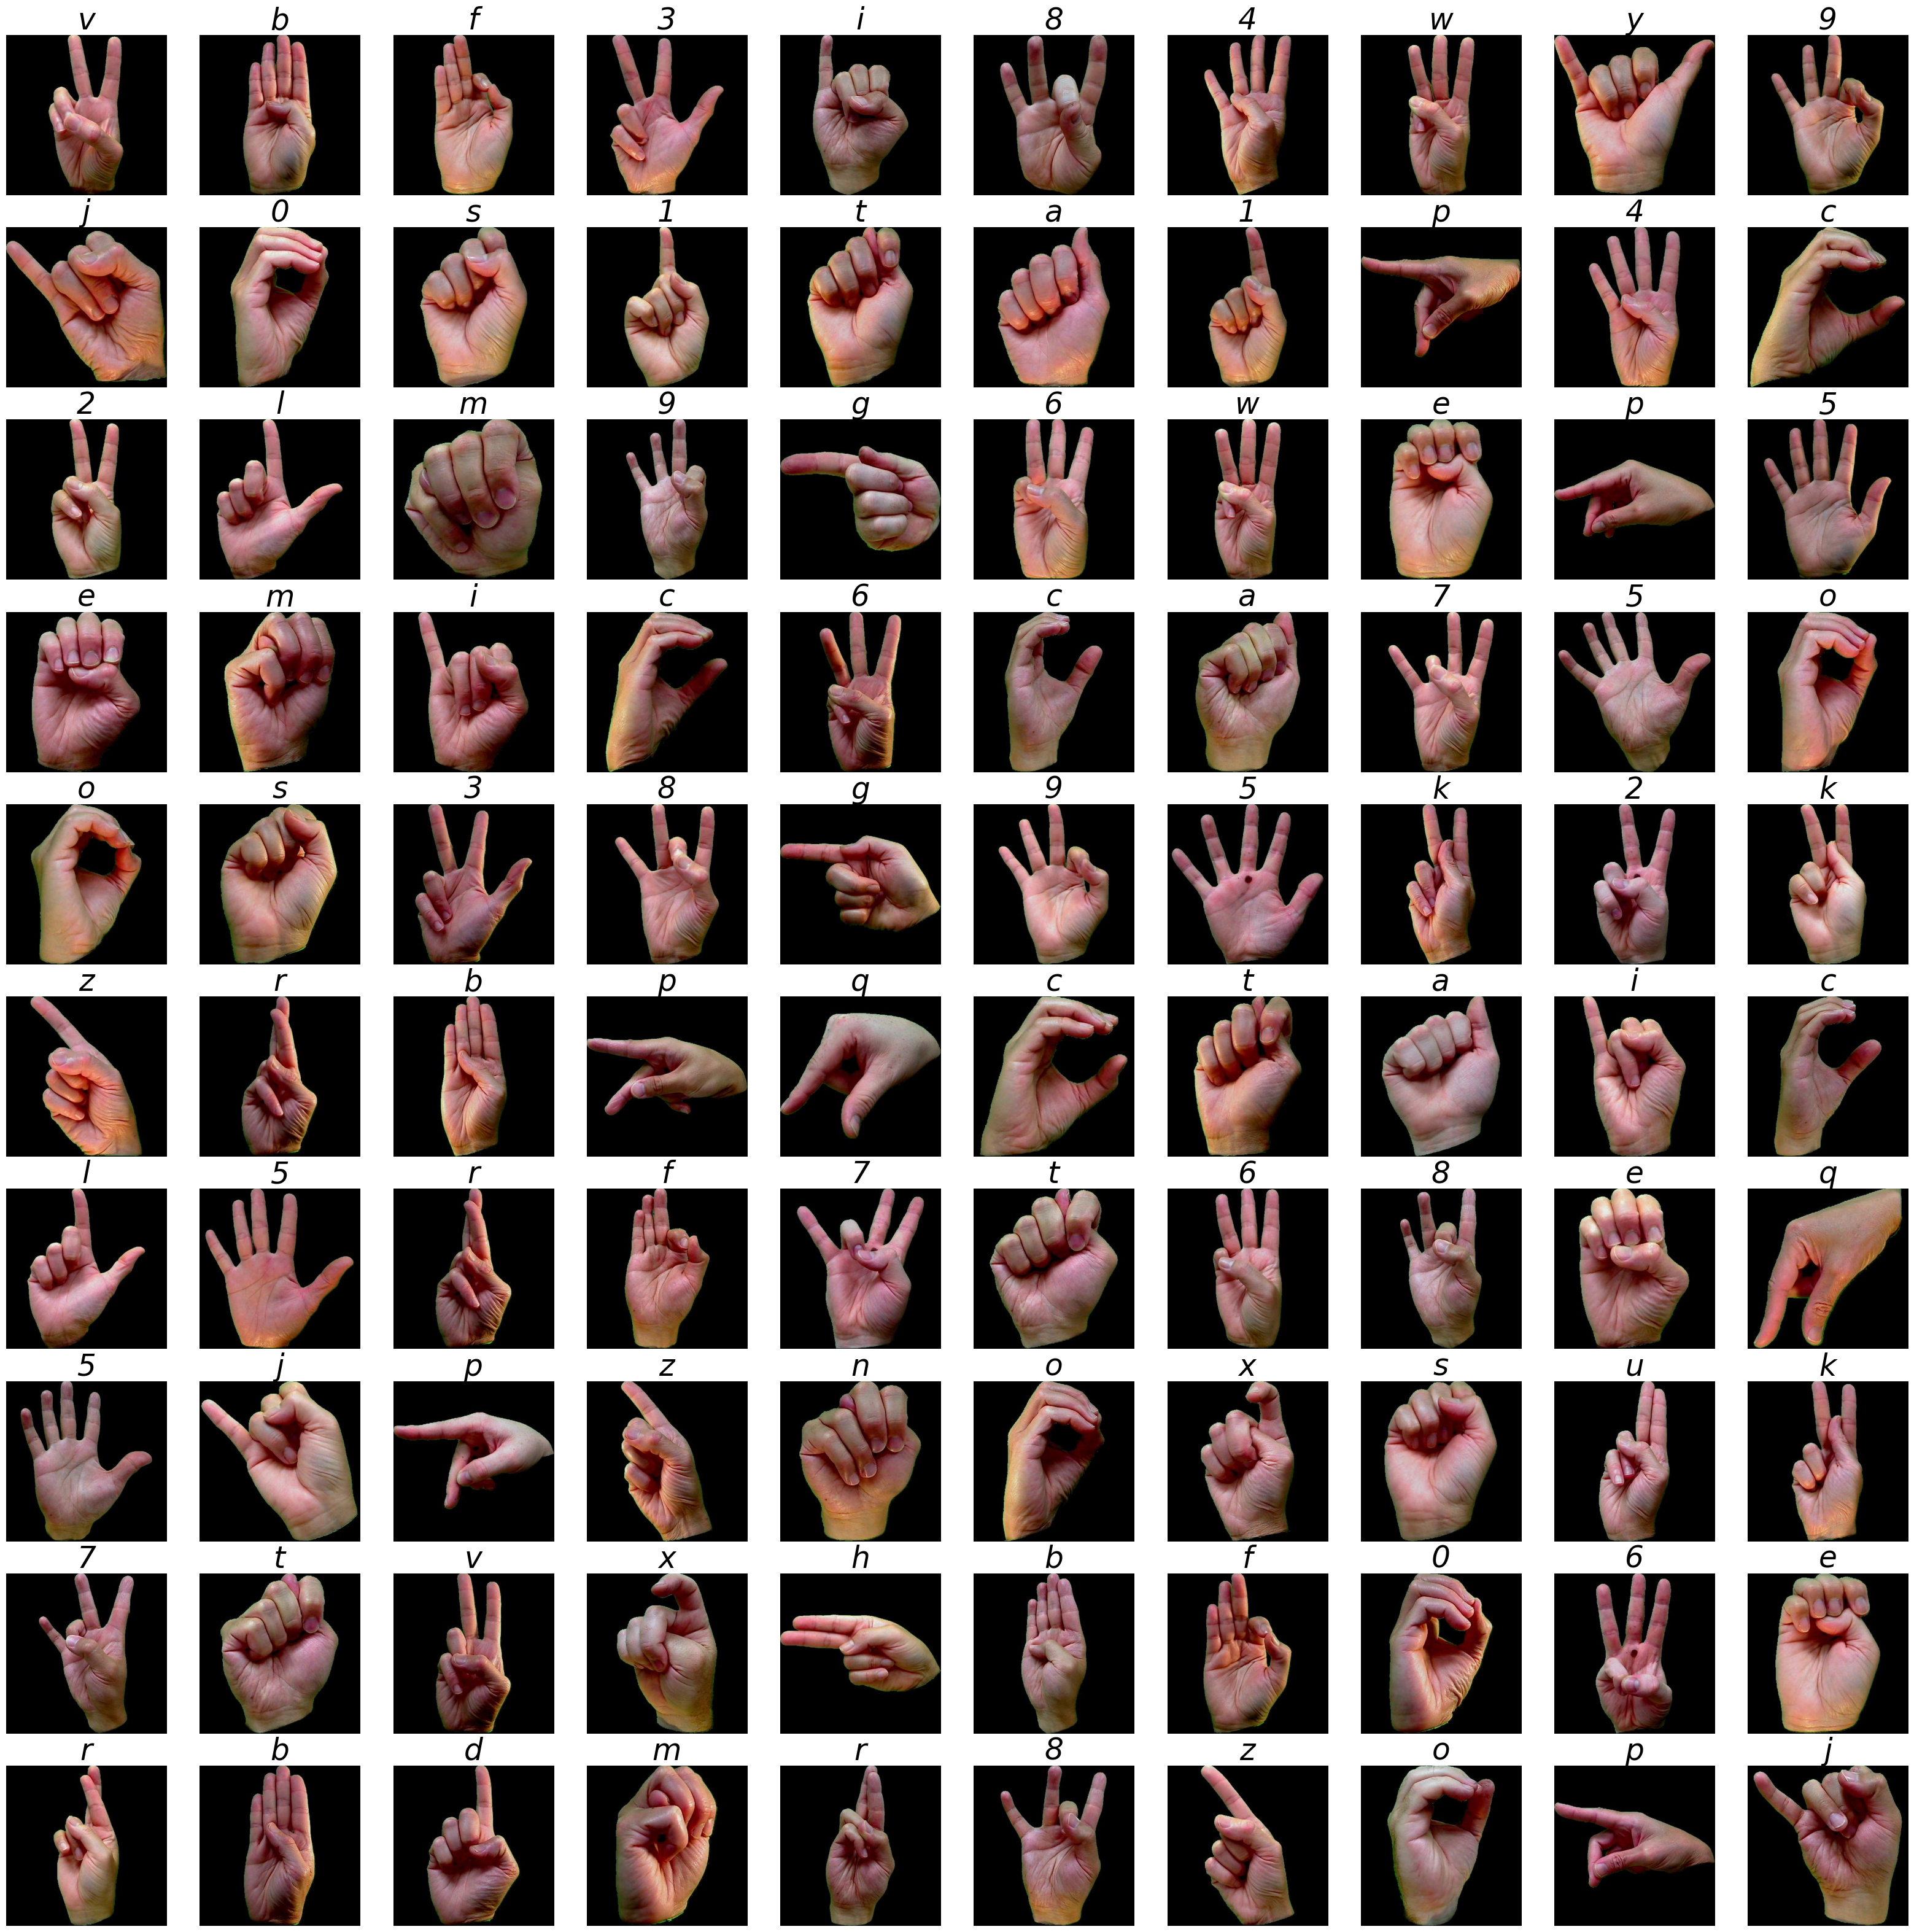

In [3]:
plt.figure(figsize=(40,40))

for i in range(100):
    path = os.path.join(base_path, df.filename[i])
    img = plt.imread(path)
    plt.subplot(10,10, i + 1)
    plt.imshow(img)
    plt.title(categories[df.category[i]],fontsize=35,fontstyle='italic')
    plt.axis("off")

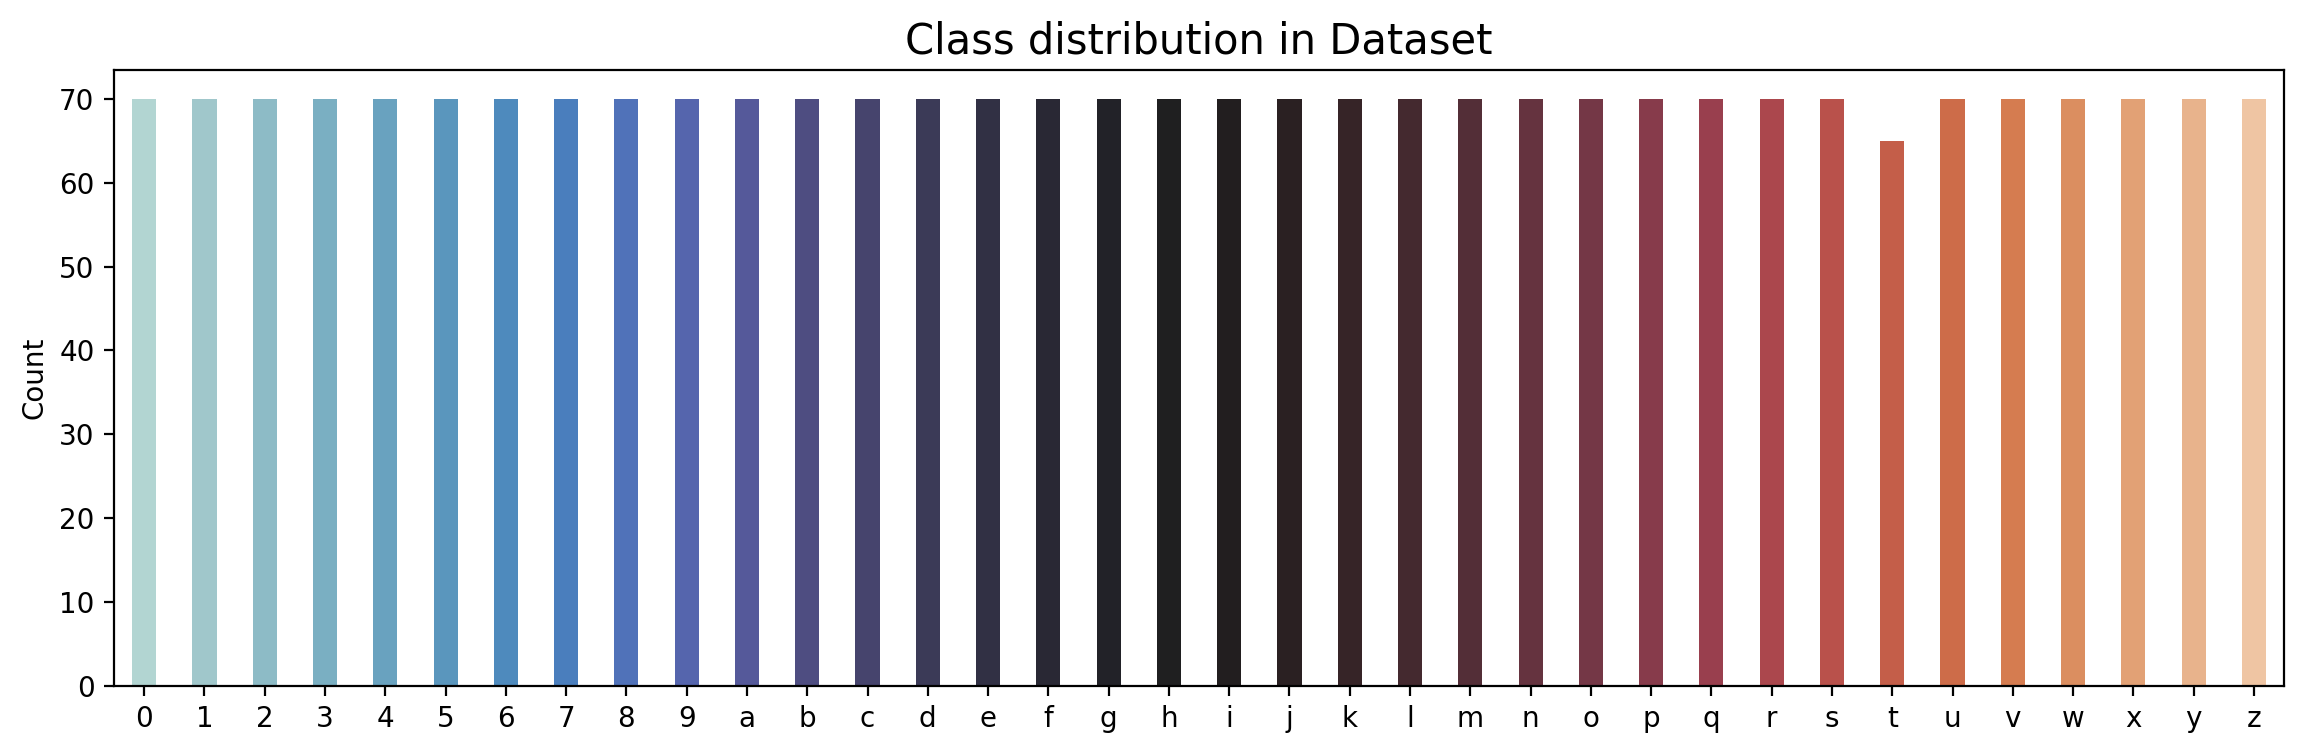

In [4]:
label, count = np.unique(df.category, return_counts=True)
uni = pd.DataFrame(data=count,index=categories.values(),columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in Dataset',fontsize=15)
plt.show()

In [ ]:
splitfolders.ratio('/kaggle/input/asl-dataset/asl_dataset',output='/kaggle/working/', seed=1333, ratio=(0.8,0.1,0.1))